In [19]:
from nansat.nansat import Nansat
from nansat.domain import Domain
from nansat.nsr import NSR
import matplotlib.pyplot as plt

In [20]:
narc = Nansat('/vagrant/shared/test_data/cmems/ARC-METNO-ARC-TOPAZ4_2_PHYS-FOR-TDS-x10-X30-y55-Y73-20170518-20170526.nc') 

=>Arctic Ocean Physics Analysis and Forecast, 12.5km daily mean (dataset-topaz4-arc-myoceanv2-be)<=


In [21]:
nglob = Nansat('/vagrant/shared/test_data/cmems/GLOBAL_ANALYSIS_FORECAST_PHY_001_024-TDS-x10-X30-y55-Y73-201705181200-201705271200.nc') 

=>daily mean fields from Global Ocean Physics Analysis and Forecast updated Daily<=


In [22]:
#d = Domain(NSR().wkt, '-te -10 55 30 73 -tr 0.125 0.125')
#narc.reproject(d, addmask=False)
#nglob.reproject(d, addmask=False)

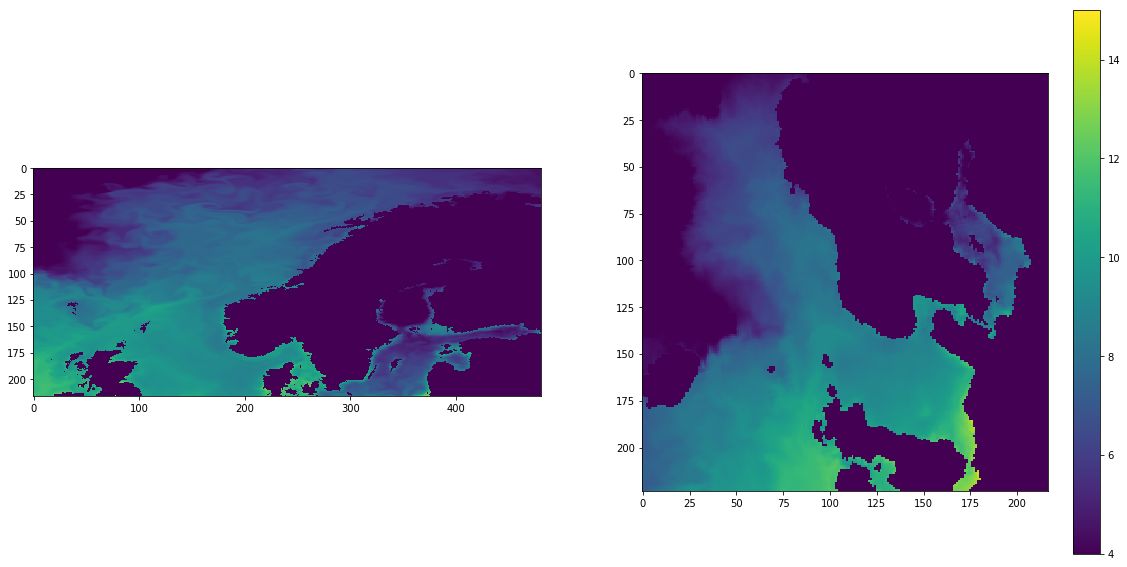

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(nglob['thetao'], vmin=4, vmax=15)
plt.subplot(1,2,2)
plt.imshow(narc['temperature'], vmin=4, vmax=15)
plt.colorbar()
plt.show()